### Scraping dei vincitori del Leone d'Oro alla Mostra di Venezia

In [1]:
using Cascadia, Gumbo, HTTP, DataFrames, PyPlot, Dates

In [2]:
date_start = Dates.now()

2018-11-26T08:41:11.033

In [3]:
sorgente = HTTP.get("https://it.wikipedia.org/wiki/Leone_d%27oro_al_miglior_film");
println(sorgente.status)

html = parsehtml(String(sorgente.body));
println(typeof(sorgente))
println(typeof(html))

# estraggo la sola tabella html dei vincitori
tabella = eachmatch(Selector(".wikitable"),html.root);

#println(typeof(tabella))
#println(size(tabella))
#println(length(tabella))

200
HTTP.Messages.Response
HTMLDocument


### Array "Anni"

In [4]:
# funzionante tenere
anni = []
for i = 2:length(tabella[1][1][1:length(tabella[1][1].children)])
    value_anno = nodeText(tabella[1][1][i][1])
    if value_anno != "1953" && value_anno != "1956" && value_anno != "1969-1972" && value_anno != "1973" && value_anno != "1974-1976" && value_anno != "1977-1978" && value_anno != "1979" 
        child_length = length(tabella[1][1][i].children)
        if child_length < 4
            #println(nodeText(tabella[1][1][i-1][1]))
            #println("minore di 4")
            push!(anni, nodeText(tabella[1][1][i-1][1]));
        elseif child_length == 4
            #println(nodeText(tabella[1][1][i][1]))
            #println("uguale a 4")
            push!(anni, nodeText(tabella[1][1][i][1]));
        end
    end
end


### Array "Nazioni"

In [5]:
nazioni = []
for i = 2:length(tabella[1][1][1:length(tabella[1][1].children)])
    value_anno = nodeText(tabella[1][1][i][1])
    if value_anno != "1953" && value_anno != "1956" && value_anno != "1969-1972" && value_anno != "1973" && value_anno != "1974-1976" && value_anno != "1977-1978" && value_anno != "1979" 
        if length(tabella[1][1][i].children) < 4
            #println(nodeText(tabella[1][1][i][3][2][1]))
            #println("minore di 4")
            push!(nazioni, nodeText(tabella[1][1][i][3][2][1]))
        elseif length(tabella[1][1][i].children) == 4
            #println(nodeText(tabella[1][1][i][4][2][1]))
            #println("uguale a 4")
            push!(nazioni, nodeText(tabella[1][1][i][4][2][1]))
        end
    end
end

In [6]:
# sistemo le eccezioni delle annate con doppia o tripla nazionalità di produzione del film vincitore
vect_1 = [
    nodeText(tabella[1][1][24][1]),nodeText(tabella[1][1][46][1]),
    nodeText(tabella[1][1][62][1]),nodeText(tabella[1][1][62][1])
];
vect_2 = [
    nodeText(tabella[1][1][24][4][5]),
    nodeText(tabella[1][1][47][3][5]),
nodeText(tabella[1][1][62][4][5]),
nodeText(tabella[1][1][62][4][8])
];

### dataframe e grafico

In [7]:
df1 = DataFrame(A = nazioni, B =anni);
df2 = DataFrame(A = vect_2, B = vect_1);
df = append!(df1,df2);
headers = nodeText(tabella[1][1][1]);
headers= split(headers);
names!(df, Symbol.([headers[4],headers[1]]));
#df = unique(df, [:Nazione,:Anno]); # eliminiamo il problema delle annate con doppio vincitore della stessa nazionalità

graph_data = by(df, :Nazione, nrow); # groupby per conteggio delle occorrenze di ciascuna nazione
graph_data = sort!(graph_data, :x1, rev=true); #sort dal più alto al più basso

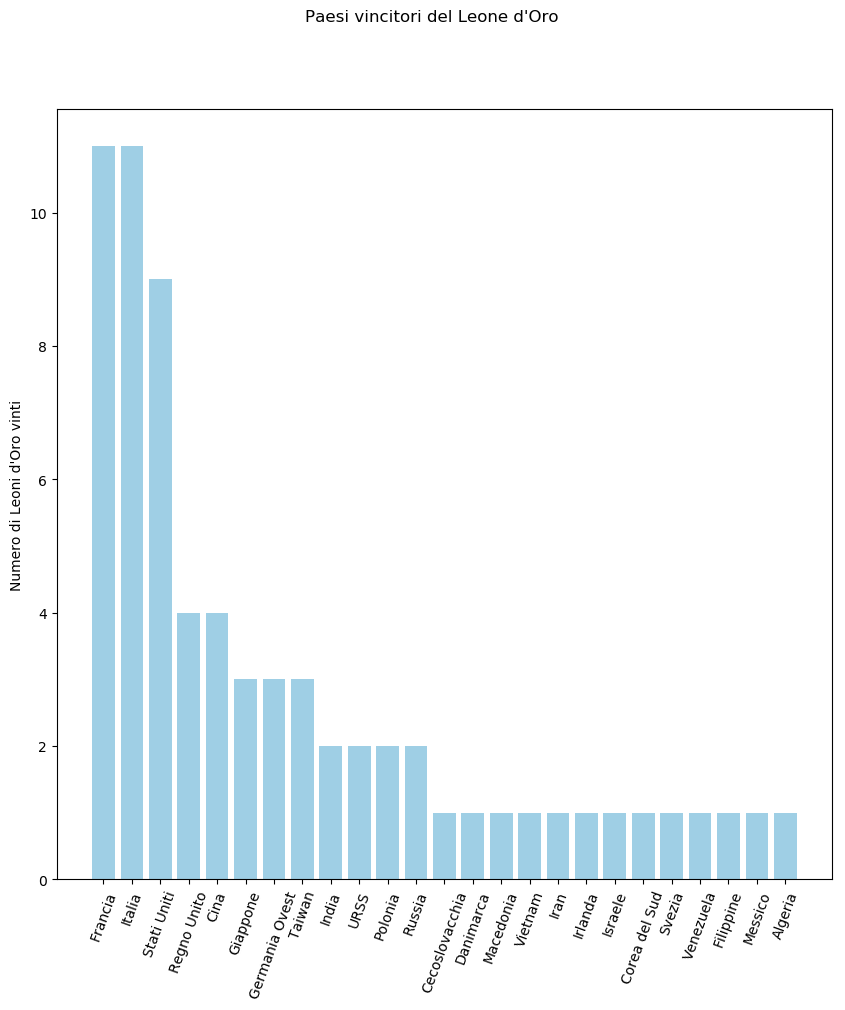

PyObject Text(0.5, 0.98, "Paesi vincitori del Leone d'Oro")

In [8]:
fig = figure("pyplot_barplot",figsize=(10,10))
b = bar(graph_data.Nazione,
    graph_data.x1,color="#0f87bf",
    align="center",
    alpha=0.4
    )
xlabel("")
ylabel("Numero di Leoni d'Oro vinti")
xticks(rotation=70)
suptitle("Paesi vincitori del Leone d'Oro")

In [9]:
date_end = Dates.now()
println(date_end - date_start)

17513 milliseconds


In [10]:
#fine ,Julia rulez :P